In [47]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

feature = pd.DataFrame(iris['data'],columns = iris['feature_names'])
target = pd.DataFrame(iris['target'],columns = ['class'])

data = pd.concat([feature, target], axis = 1)
df = data[data['class']!=0] #只考慮類別為0或1的資料

In [48]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


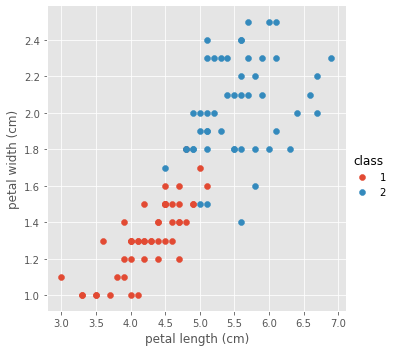

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
g = sns.FacetGrid(df, hue = 'class', size=5)
g.map(plt.scatter, 'petal length (cm)', 'petal width (cm)')
g.add_legend()

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,2:4].values
y = df.iloc[:,4].values

sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [57]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

lr = LogisticRegression(C = 100.0, random_state = 1)
lr.fit(X_std,y)

print(lr.coef_)
print(lr.intercept_)

[[4.55171443 4.28638086]]
[0.45104307]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [2]:
def plot_decission_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    
    # setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.xlim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                   alpha=0.8,
                   c=colors[idx],
                   label=cl,
                   edgecolor='black')
    
    if test_idx:
        X_test,y_test = X[test_idx,:], y[test_idx]
        
        plt.scatter(X_test[:,0],
                    X_test[:,1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                   label='test set')

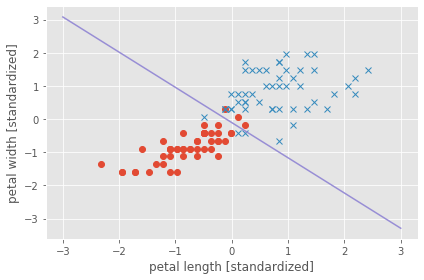

In [59]:
theta_0 = lr.intercept_[0]
theta_1 = lr.coef_[0][0]
theta_2 = lr.coef_[0][1]

t  = np.linspace(-3,3,200)
plt.plot(X_std[y==1,0], X_std[y==1,1], 'o')
plt.plot(X_std[y==2,0], X_std[y==2,1], 'x')
plt.plot(t, -(theta_0+theta_1*t)/theta_2)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.tight_layout()

plt.show()